Import Library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#import seaborn as sns

import pandas as pd
import pandas as pd
import numpy as np
import re 
import nltk 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold


from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
plt.style.use('ggplot')
import matplotlib.patches as mpatches

# 2. Data Load and Data Understanding

In [2]:
df_train = pd.read_csv("Dataset/SentimentAnalysisofTweetsthroughAltmetrics/train.csv")
df_test = pd.read_csv("Dataset/SentimentAnalysisofTweetsthroughAltmetrics/test.csv")

In [3]:
# df
df_train.columns = ["text", "emotion"]
df_test.columns = ["text", "emotion"]



In [8]:
# remove the neutural.
df_train= df_train[df_train['emotion'] != 0]
df_test= df_test[df_test['emotion'] != 0]

In [29]:
#joy
#joy_text = df_train[df_train["emotion"] == '1']["text"].values
#for i in range(0,5):
#    print(joy_text[i], "\n")

In [30]:
#sad
#sadness_text = df_train[df_train["emotion"] == 'sadness']["text"].values
#for i in range(0,5):
#    print(sadness_text[i], "\n")

In [31]:
#anger 
#anger_text = df_train[df_train["emotion"] == 'anger']["text"].values
#for i in range(0,5):
#    print(anger_text[i], "\n")

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 730
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     470 non-null    object
 1   emotion  470 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.0+ KB


In [6]:
#df_train.describe()

In [11]:
list(df_train.emotion.unique()) , list(df_test.emotion.unique()) 

([-1, 1], [1, -1])

In [12]:
df_train.head(10)

,text,emotion
0,good acronym copper nanotubes Definitely,-1
2,GlycemicIndex diet restricted energy effective...,1
3,higher fibre intake partic cereal fibre reduce...,1
4,next life going research copper nanotubes CuNTs,-1
6,Bean rich diet produces equivalent weight loss...,1
9,CuNT copper nanotube,-1
10,Careful acronyms energetic electronic properti...,-1
11,paper online platform opendata bioinformatics,1
12,Protip There many many better acronyms copper ...,-1
13,Freshwater fish also contaminated microplastics,1


In [13]:
#
def missing_percentage(df_train):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df_train.isnull().sum().sort_values(ascending = False)
    percent = round(df_train.isnull().sum().sort_values(ascending = False)/len(df_train)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(df_train)

,Total,Percent
text,0,0.0
emotion,0,0.0


In [37]:
# #Melihat Sebaran Label
# import seaborn as sns
# sns.countplot(x ='label', data = df,order = df["label"].value_counts().index)
 
# # Show the plot
# plt.show()

In [38]:
#pip uninstall nltk

In [39]:
#pip install -U nltk

In [14]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Asif
[nltk_data]     Raza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


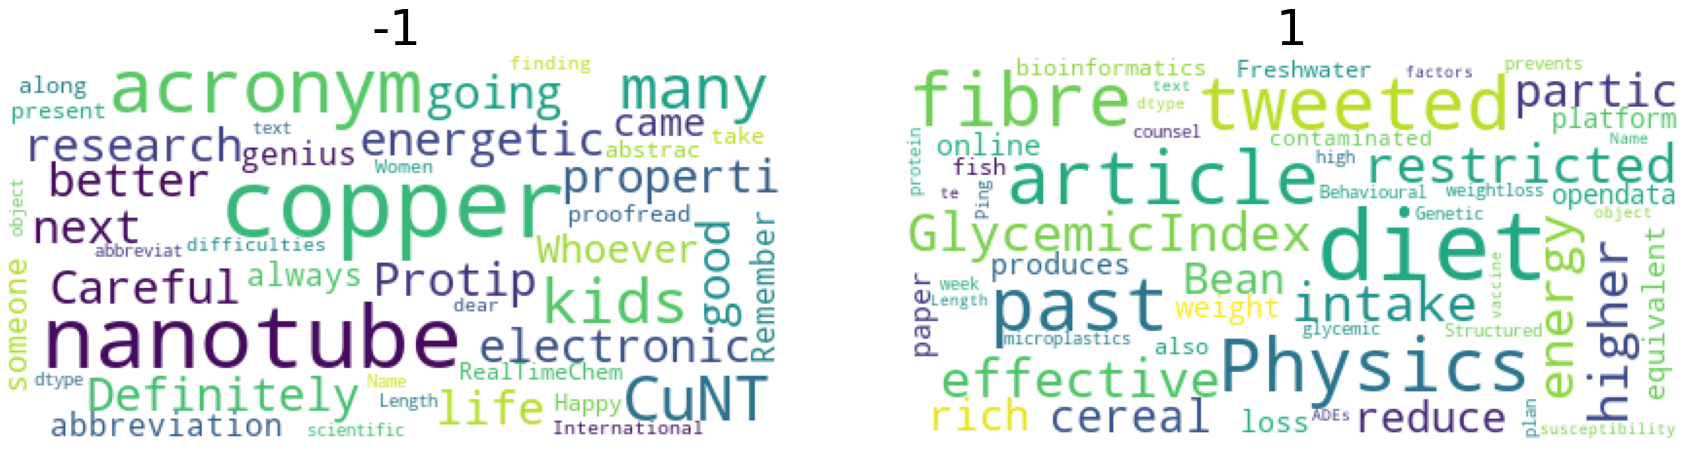

In [16]:
def get_wordcloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words('english')).generate(str(text))
    
    return wordcloud

emotions = df_train["emotion"].unique()

figure, axes = plt.subplots(ncols=2, nrows=1,figsize=(30,25))
plt.axis('off')

# for each emotion
for emotion, ax in zip(emotions, axes.flat):
    wordcloud = get_wordcloud(df_train[df_train["emotion"]==emotion]['text'])
    ax.imshow(wordcloud)
    ax.title.set_text(emotion)
    ax.title.set_size(50)
    
    ax.axis('off')
    
plt.subplots_adjust(wspace=0.15, hspace=0.05)

<AxesSubplot:>

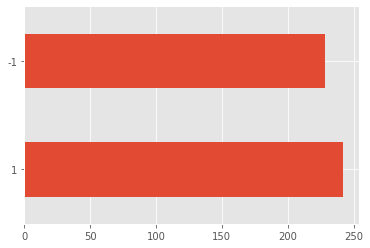

In [17]:
#Data Visulalization

df_train['emotion'].value_counts().plot(kind='barh')

<AxesSubplot:ylabel='emotion'>

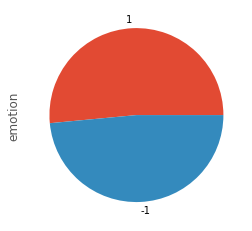

In [18]:
df_train['emotion'].value_counts().plot(kind='pie')

 Label Encoding

In [44]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#df_train['label_enc'] = labelencoder.fit_transform(df_train['emotion'])
#df_test['label_enc'] = labelencoder.transform(df_test['emotion'])

In [45]:
#map = df_train[['emotion','label_enc']].drop_duplicates(keep='first')
#map

In [19]:
#targets = labelencoder.inverse_transform([0,1,2,3,4,5])
#targets

In [20]:
def relabel(a) :
    if a == -1 :
        o = "Negitive"
    #elif a == 0 :
    #    o = "Neutural"
    elif a == 1 :
        o = "Positive"
    else :
        o = "Neutural"
    return o

In [ ]:
#df_test[['emotion','label_enc']].drop_duplicates(keep='first')

In [ ]:
# import nltk
# nltk.download('punkt')
# from nltk.stem.porter import PorterStemmer
# from nltk.tokenize.treebank import TreebankWordDetokenizer

# porter_stemmer = PorterStemmer()    

# sentence_stemm_train = []
# for i in range(df.shape[0]):
#     word_data = df.sentence[i]
#     nltk_tokens = nltk.word_tokenize(word_data)
#     word=[]
#     for w in nltk_tokens:
#         word.append(porter_stemmer.stem(w))
#     sentence = TreebankWordDetokenizer().detokenize(word)
#     sentence_stemm_train.append(sentence)

# sentence_stemm_test = []
# for i in range(df_test.shape[0]):
#     word_data = df_test.sentence[i]
#     nltk_tokens = nltk.word_tokenize(word_data)
#     word=[]
#     for w in nltk_tokens:
#         word.append(porter_stemmer.stem(w))
#     sentence = TreebankWordDetokenizer().detokenize(word)
#     sentence_stemm_test.append(sentence)

# df["sentence_stemm"] = np.array(sentence_stemm_train)
# df_test["sentence_stemm"] = np.array(sentence_stemm_test)

  Tfidf

In [22]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, stop_words='english')

# We transform each text into a vector
features_train = tfidf.fit_transform(df_train.text).toarray()
features_test = tfidf.transform(df_test.text).toarray()

features_train_name = tfidf.get_feature_names()

#labels = df_train.label_enc
labels = df_train.emotion

print("Number of features after extracting : "+str(features_train.shape[1]))

Number of features after extracting : 117


In [23]:
feature_train_df = pd.DataFrame(data=features_train,    # values,    # 1st column as index
                                columns=features_train_name)  # 1st row as the column names

In [24]:
feature_train_df

,abbreviate,abbreviation,abbreviations,ability,abstract,acronym,acronyms,adhd,adults,analysis,...,study,term,trial,type,unfortunate,verbal,wall,weight,work,wrong
0,0.0,0.0,0.00000,0.0,0.0,0.482537,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.339412,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.286478,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
466,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
467,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
468,0.0,0.0,0.36575,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.397465,0.0


LinearSVC()

In [25]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#mencoba beberapa algoritma machine learning

# models = [
#     RandomForestClassifier,
#     LinearSVC(),
#     MultinomialNB(),XGBClassifier()
# ]

models = [LinearSVC()]

# 5 Cross-validation
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features_train, labels, scoring='f1_macro', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'f1_macro'])

In [26]:
mean_f1 = cv_df.groupby('model_name').f1_macro.mean()
std_f1 = cv_df.groupby('model_name').f1_macro.std()

f1 = pd.concat([mean_f1, std_f1], axis= 1, 
          ignore_index=True)
f1.columns = ['Mean F1_Macro', 'Standard deviation']
f1

,Mean F1_Macro,Standard deviation
model_name,,
LinearSVC,0.851041,0.052939


In [27]:
#model = LinearSVC()

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=.01)


model.fit(features_train, labels)
y_pred = model.predict(features_test)

In [ ]:
# labels

 Data Testing 

In [28]:
#pred_cat = []
#for i in y_pred:
#  cat = relabel(i)
#  pred_cat.append(cat)
#pred_cat = np.array(pred_cat)

In [32]:
#print(classification_report(df_test.emotion, pred_cat))

In [30]:
def predict_emotion(text):
    x = tfidf.transform([text]).toarray()
    pred = relabel(model.predict(x))
    return pred

In [31]:
text = "i am feeling sad"
predict_emotion(text)

'Positive'

## SHAP

In [33]:
import shap
import transformers


tokenizer = transformers.AutoTokenizer.from_pretrained("nateraw/bert-base-uncased-emotion", use_fast=True)
model = transformers.AutoModelForSequenceClassification.from_pretrained("nateraw/bert-base-uncased-emotion")

#classifier = transformers.pipeline('text-classification', model = model, tokenizer=tokenizer, return_all_scores=True)
classifier = transformers.pipeline('sentiment-analysis', return_all_scores=True)

classifier(df_train.text[:3].tolist())

[[{'label': 'NEGATIVE', 'score': 0.00166476855520159},
  {'label': 'POSITIVE', 'score': 0.9983352422714233}],
 [{'label': 'NEGATIVE', 'score': 0.9965616464614868},
  {'label': 'POSITIVE', 'score': 0.003438386367633939}],
 [{'label': 'NEGATIVE', 'score': 0.35527604818344116},
  {'label': 'POSITIVE', 'score': 0.6447239518165588}]]

In [34]:
#targets.tolist()
targets = df_train.emotion.unique()

In [35]:
explainer = shap.Explainer(classifier , output_names= targets)

In [36]:
shap_values = explainer(df_train['text'][:3])
shap.plots.text(shap_values)

Partition explainer: 4it [00:28, 14.22s/it]               
